In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize']= (12,8)



df= pd.read_csv(r'C:\Users\u\Downloads\tested.csv.xls')

In [2]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Analyze the data.

<Axes: xlabel='Survived', ylabel='count'>

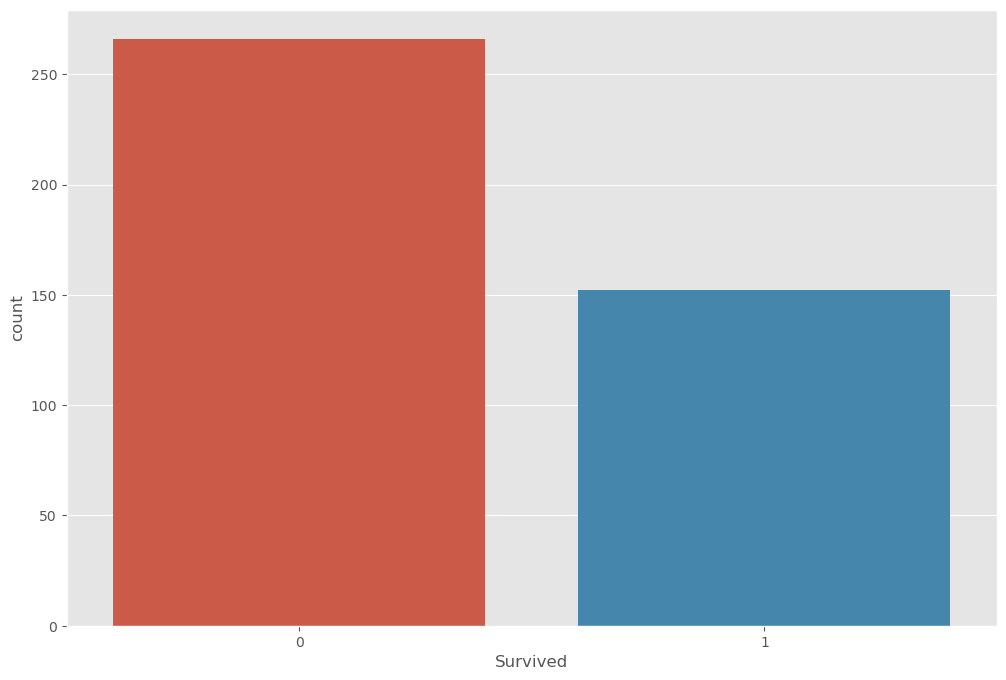

In [3]:
sns.countplot (x='Survived',data=df)

<Axes: xlabel='Survived', ylabel='count'>

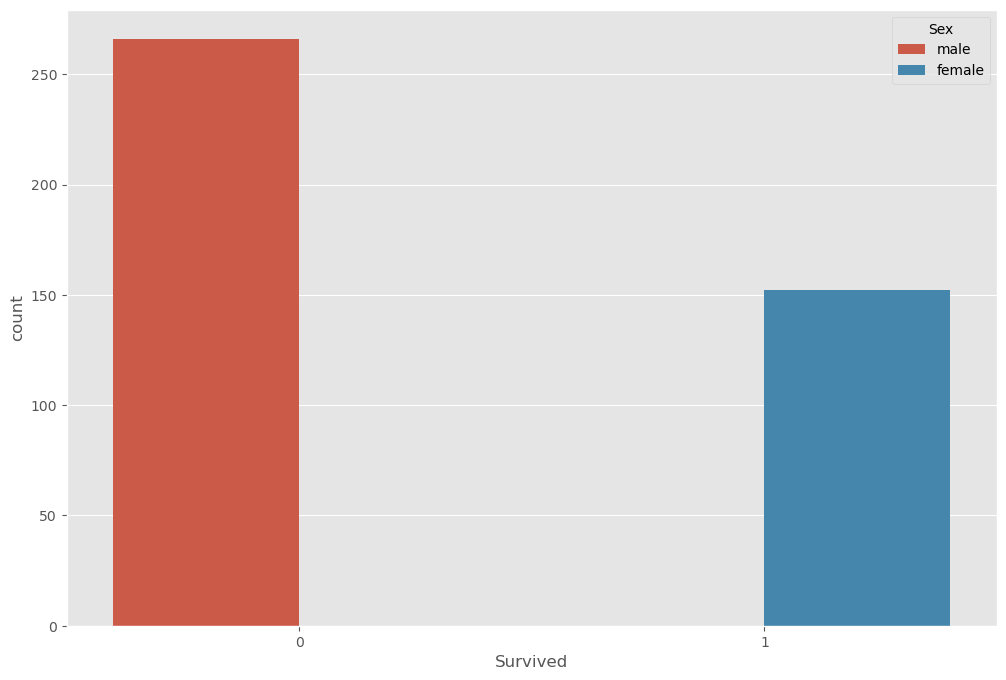

In [4]:
 sns.countplot(x='Survived', hue='Sex', data=df)

<Axes: xlabel='Survived', ylabel='count'>

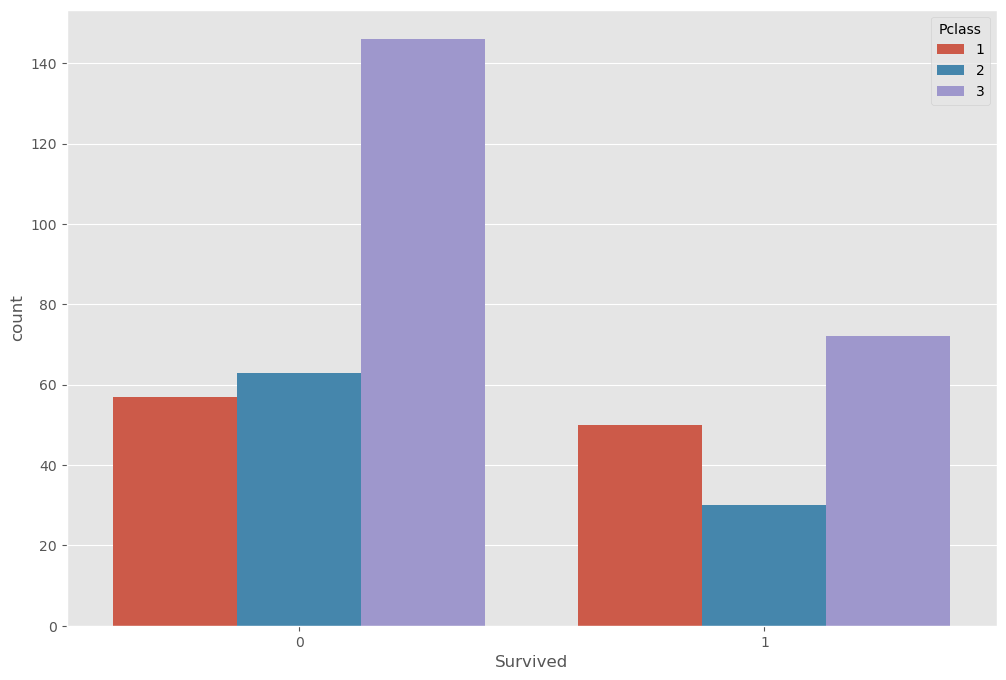

In [5]:
 sns.countplot(x='Survived', hue='Pclass', data=df)

<Axes: ylabel='Frequency'>

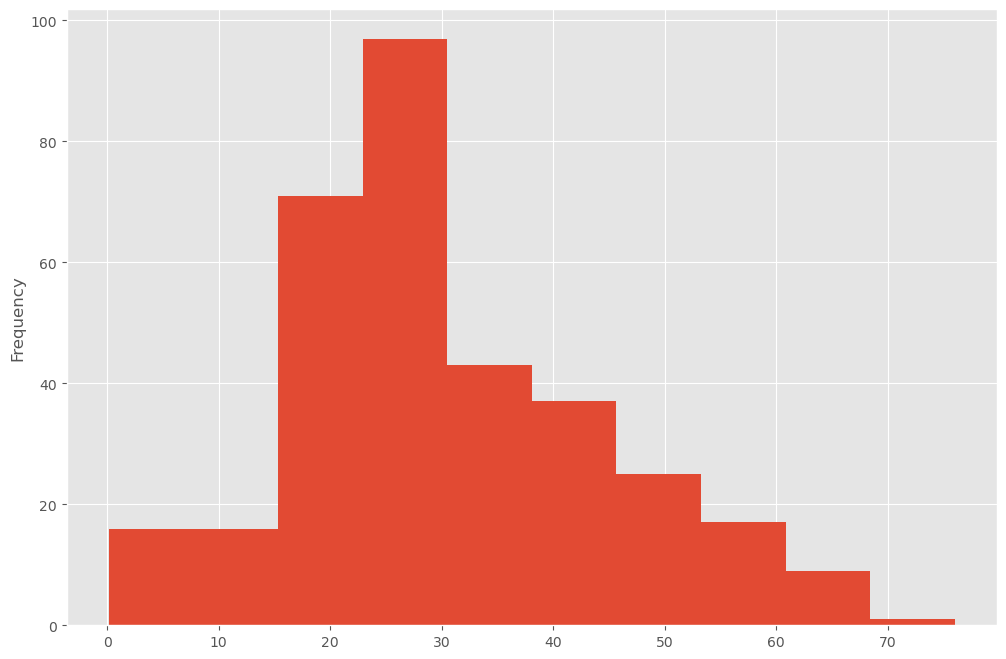

In [6]:
df['Age'].plot.hist()

Data wrangling and cleaning

In [7]:
df=df.drop(columns=['Name','Ticket','Cabin'],axis=1)

In [8]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,male,34.5,0,0,7.8292,Q
1,893,1,3,female,47.0,1,0,7.0000,S
2,894,0,2,male,62.0,0,0,9.6875,Q
3,895,0,3,male,27.0,0,0,8.6625,S
4,896,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,1305,0,3,male,NaN,0,0,8.0500,S
414,1306,1,1,female,39.0,0,0,108.9000,C
415,1307,0,3,male,38.5,0,0,7.2500,S
416,1308,0,3,male,NaN,0,0,8.0500,S


<Axes: >

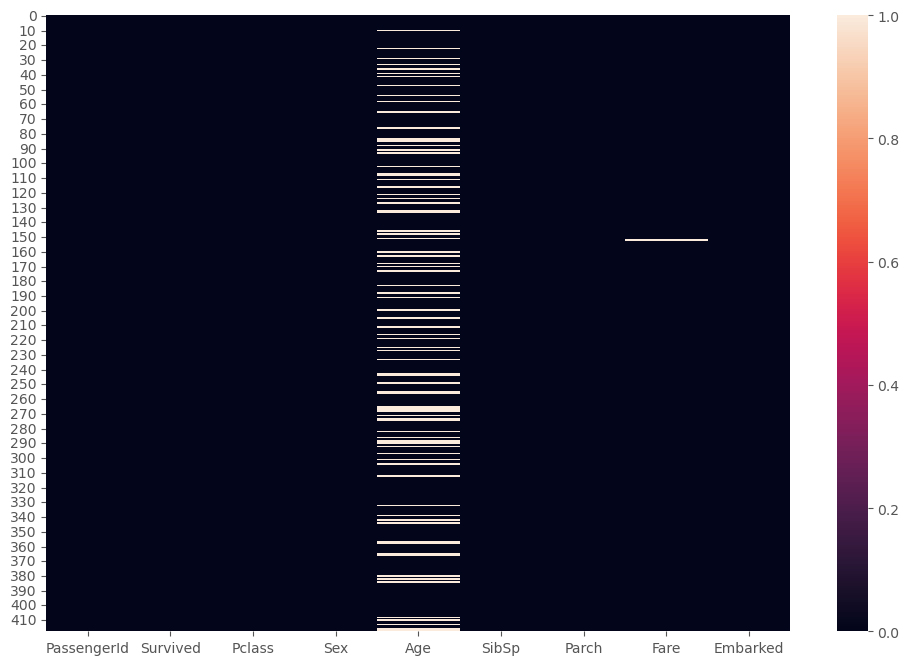

In [9]:
sns.heatmap(df.isnull())

In [10]:
df['Age']=df['Age'].interpolate()

<Axes: >

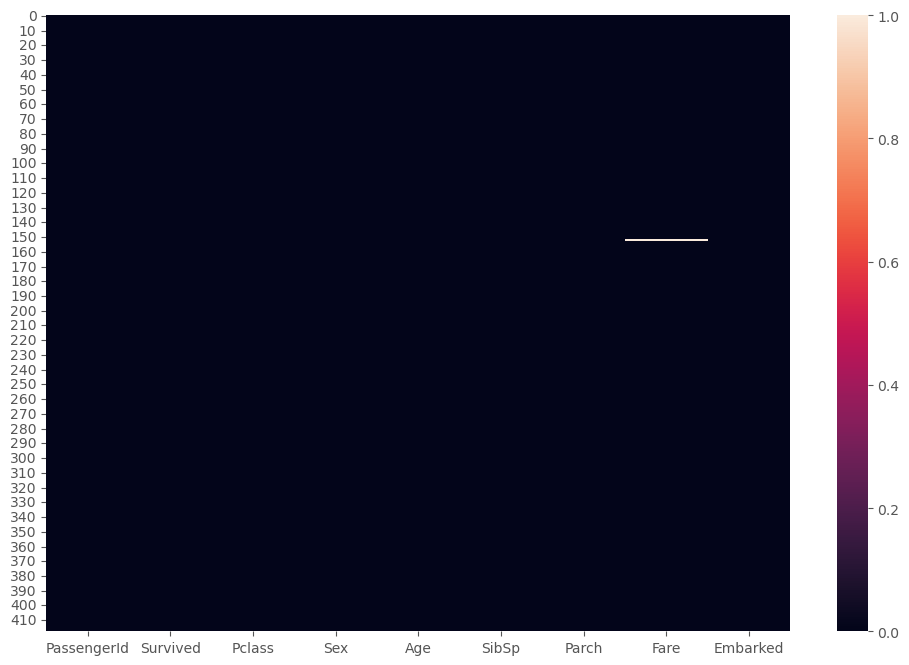

In [11]:
sns.heatmap(df.isnull())

In [12]:
df=df.dropna()
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,male,34.5,0,0,7.8292,Q
1,893,1,3,female,47.0,1,0,7.0000,S
2,894,0,2,male,62.0,0,0,9.6875,Q
3,895,0,3,male,27.0,0,0,8.6625,S
4,896,1,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,1305,0,3,male,33.5,0,0,8.0500,S
414,1306,1,1,female,39.0,0,0,108.9000,C
415,1307,0,3,male,38.5,0,0,7.2500,S
416,1308,0,3,male,38.5,0,0,8.0500,S


In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Survived     417 non-null    int64  
 2   Pclass       417 non-null    int64  
 3   Sex          417 non-null    object 
 4   Age          417 non-null    float64
 5   SibSp        417 non-null    int64  
 6   Parch        417 non-null    int64  
 7   Fare         417 non-null    float64
 8   Embarked     417 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 32.6+ KB


convert cartegororical columns to binary 

In [14]:
EmbarkedColumnDummy=pd.get_dummies(df[('Embarked')],dtype=float)


In [15]:
SexColumnDummy= pd.get_dummies(df[('Sex')], dtype=float)

In [16]:
df =pd.concat((df,EmbarkedColumnDummy,SexColumnDummy),axis=1)

In [17]:
df=df.drop(['Sex','Embarked'],axis=1)

In [18]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
0,892,0,3,34.5,0,0,7.8292,0.0,1.0,0.0,0.0,1.0
1,893,1,3,47.0,1,0,7.0000,0.0,0.0,1.0,1.0,0.0
2,894,0,2,62.0,0,0,9.6875,0.0,1.0,0.0,0.0,1.0
3,895,0,3,27.0,0,0,8.6625,0.0,0.0,1.0,0.0,1.0
4,896,1,3,22.0,1,1,12.2875,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,33.5,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
414,1306,1,1,39.0,0,0,108.9000,1.0,0.0,0.0,1.0,0.0
415,1307,0,3,38.5,0,0,7.2500,0.0,0.0,1.0,0.0,1.0
416,1308,0,3,38.5,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Survived     417 non-null    int64  
 2   Pclass       417 non-null    int64  
 3   Age          417 non-null    float64
 4   SibSp        417 non-null    int64  
 5   Parch        417 non-null    int64  
 6   Fare         417 non-null    float64
 7   C            417 non-null    float64
 8   Q            417 non-null    float64
 9   S            417 non-null    float64
 10  female       417 non-null    float64
 11  male         417 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 42.4 KB


seperate the dataframe into x and y
then deleted survive column from x

In [20]:
x=df.values 
y=df ['Survived'].values

In [21]:
x = np.delete(x,1,axis=1)

split the dataset

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

Decision tree classifer

In [23]:
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier(max_depth=5) 
dt_clf.fit(x_train, y_train)

y_pred=dt_clf.predict(x_test)
dt_clf.score(x_test, y_test)





1.0

In [24]:
y_pred =dt_clf.predict(x_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred) 

array([[71,  0],
       [ 0, 55]], dtype=int64)

Random forest classifer

In [27]:
from sklearn import ensemble
rf_clf = ensemble.RandomForestClassifier(n_estimators=100) 
rf_clf.fit(x_train, y_train)
rf_clf.score(x_test, y_test)

1.0

Gradient Boosting Classifier

In [28]:
gb_clf = ensemble.GradientBoostingClassifier()
gb_clf.fit(x_train, y_train)
gb_clf.score(x_test, y_test)          

1.0

TUNING THE GB CLASSIFIER

In [29]:
gb_clf = ensemble.GradientBoostingClassifier(n_estimators=40)
gb_clf.fit(x_train, y_train)
gb_clf.score(x_test, y_test)

1.0

Naive Bayes Cclassifier 

In [31]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(x_train, y_train)
nb_clf.score(x_test, y_test)     

1.0

K-Nearest Neighbor Classifier

In [32]:
from sklearn.neighbors import KNeighborsClassifier 
kmn_clf =KNeighborsClassifier ()
kmn_clf.fit(x_train, y_train)
kmn_clf.score(x_test, y_test)     

0.5793650793650794

Logistic Regression Classififer

In [33]:
from sklearn.linear_model import LogisticRegression 
lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)
lr_clf.score(x_test, y_test) 

C:\Users\u\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.0

SVM Classifier

In [34]:
from sklearn.svm import SVC
sv_clf = SVC(probability=True)
sv_clf.fit(x_train, y_train)
sv_clf.score(x_test, y_test) 

0.5634920634920635

Prediction Probabilities 

In [35]:
r_probs =[0 for _ in range(len(y_test))]
rf_probs =rf_clf.predict_proba(x_test)
nb_probs =nb_clf.predict_proba(x_test)
dt_probs =dt_clf.predict_proba(x_test)
gb_probs =gb_clf.predict_proba(x_test)
kmn_probs =kmn_clf.predict_proba(x_test)
lr_probs =lr_clf.predict_proba(x_test)
sv_probs =sv_clf.predict_proba(x_test)

Probabilities for the positive outcome 

In [36]:
rf_probs =rf_probs[:, 1]
nb_probs =nb_probs[:, 1]
dt_probs =dt_probs[:, 1]
gb_probs =gb_probs[:, 1]
kmn_probs =kmn_probs[:, 1]
lr_probs =lr_probs[:, 1]
sv_probs =sv_probs[:, 1]

AUROC Values 

In [37]:
from sklearn.metrics import roc_auc_score
r_auc=roc_auc_score(y_test,r_probs)
rf_auc=roc_auc_score(y_test,rf_probs)
nb_auc=roc_auc_score(y_test,nb_probs)
dt_auc=roc_auc_score(y_test,dt_probs)
gb_auc=roc_auc_score(y_test,gb_probs)
kmn_auc=roc_auc_score(y_test,kmn_probs)
lr_auc=roc_auc_score(y_test,lr_probs)
sv_auc=roc_auc_score(y_test,sv_probs)

The AUROC Values 

In [38]:
print('Random prediction: AUROC= %.3f' % r_auc)
print('Random Forest: AUROC= %.3f' % rf_auc)
print('Naive Bayes: AUROC= %.3f' %(nb_auc))
print('Decistion Tree prediction: AUROC= %.3f' %(dt_auc))
print('Gradient Boosting Prediction: AUROC= %.3f' %(gb_auc))
print('Knearest Neighbors  Prediction: AUROC= %.3f' %(kmn_auc))
print('Logistic Regression: AUROC= %.3f' %(lr_auc))
print('Support Vector Machine: AUROC= %.3f' %(sv_auc))

Random prediction: AUROC= 0.500
Random Forest: AUROC= 1.000
Naive Bayes: AUROC= 1.000
Decistion Tree prediction: AUROC= 1.000
Gradient Boosting Prediction: AUROC= 1.000
Knearest Neighbors  Prediction: AUROC= 0.652
Logistic Regression: AUROC= 1.000
Support Vector Machine: AUROC= 0.678


Calculating the ROC Curve

In [39]:
from sklearn.metrics import roc_curve
r_fpr, r_tpr, _ =roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ =roc_curve(y_test, rf_probs)
nb_fpr, nb_tpr, _ =roc_curve(y_test, nb_probs)
dt_fpr, dt_tpr, _ =roc_curve(y_test, dt_probs)
gb_fpr, gb_tpr, _ =roc_curve(y_test, gb_probs)
kmn_fpr, kmn_tpr, _ =roc_curve(y_test, kmn_probs)
lr_fpr, lr_tpr, _ =roc_curve(y_test, lr_probs)
sv_fpr, sv_tpr, _ =roc_curve(y_test, sv_probs)



ROC curve plot

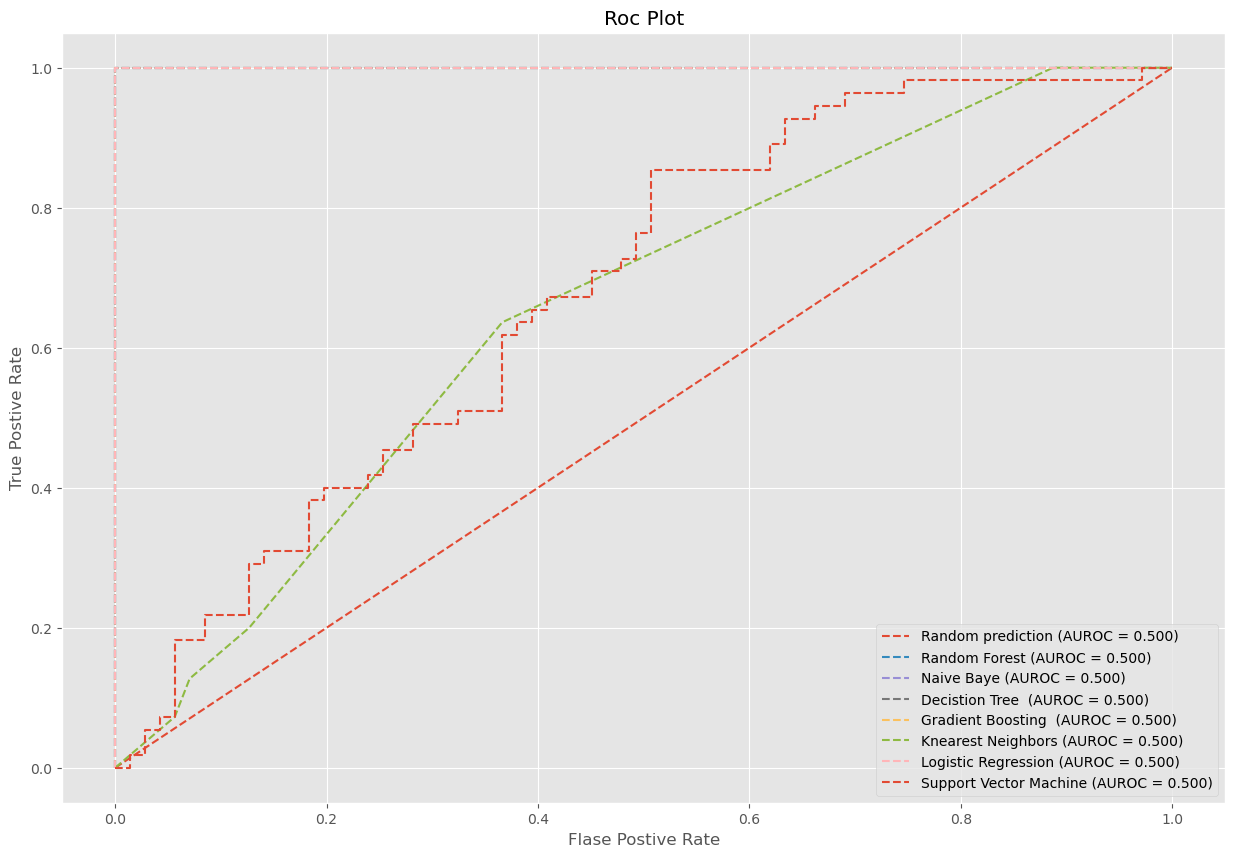

In [40]:
plt.figure(figsize=(15,10))
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' %r_auc)
plt.plot(rf_fpr, rf_tpr,linestyle='--', label='Random Forest (AUROC = %0.3f)' %r_auc)
plt.plot(nb_fpr, nb_tpr,linestyle='--', label='Naive Baye (AUROC = %0.3f)' %r_auc) 
plt.plot(dt_fpr, dt_tpr, linestyle='--', label='Decistion Tree  (AUROC = %0.3f)' %r_auc)
plt.plot(gb_fpr, gb_tpr, linestyle='--', label='Gradient Boosting  (AUROC = %0.3f)' %r_auc)
plt.plot(kmn_fpr, kmn_tpr, linestyle='--', label='Knearest Neighbors (AUROC = %0.3f)' %r_auc)
plt.plot(lr_fpr, lr_tpr, linestyle='--', label='Logistic Regression (AUROC = %0.3f)' %r_auc)
plt.plot(sv_fpr, sv_tpr, linestyle='--', label='Support Vector Machine (AUROC = %0.3f)' %r_auc)


plt.title('Roc Plot')

plt.xlabel('Flase Postive Rate')
plt.ylabel('True Postive Rate')

plt.legend()
plt.show()